python operations

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# import data file
df=pd.read_csv('/content/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# perform statical operation
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
# cheak the columns information and how many columns are contain null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# cheak null values in dataset
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#drop the columns
df = df.drop(['Invoice ID','Date','Time'], axis=1)

In [ ]:
# cheak the unique values in a column
df['gross margin percentage'].unique()

array([4.76190476])

In [ ]:
# drop column
df = df.drop(['gross margin percentage'], axis=1)

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


In [ ]:
# check shape of row and columns
print(df.shape)

(1000, 13)


In [ ]:
# value counts from the gender column
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
# create a numeric dataframe for gender columns
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
#concate dataframe with a csv file
df=pd.concat([df,gender_dummies],axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


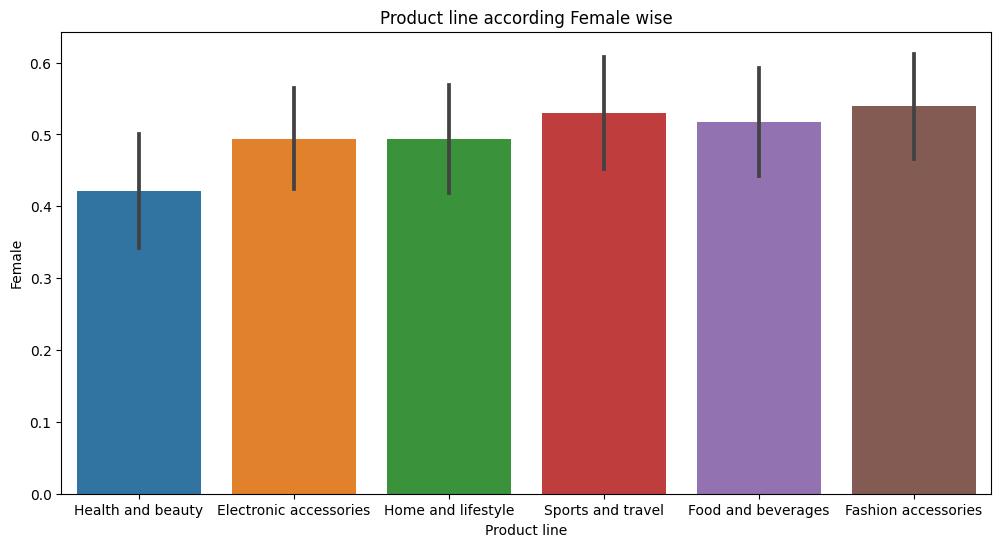

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Female', data=df)
plt.title('Product line according Female wise')
plt.show()

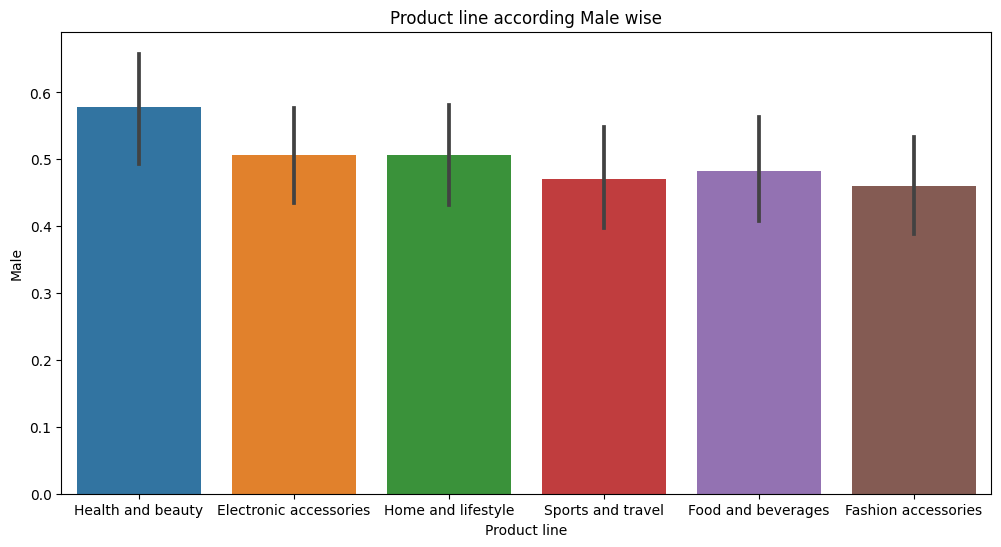

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Male', data=df)
plt.title('Product line according Male wise')
plt.show()

In [ ]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


Text(0.5, 1.0, 'City Wise Counts')

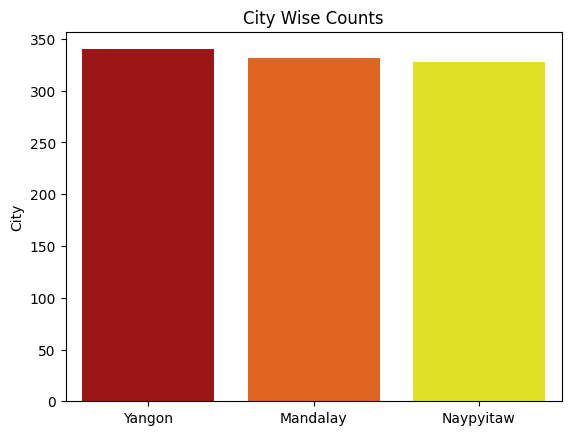

In [ ]:
sns.barplot(x=place_df.index , y=place_df['City'],palette='hot')
plt.title("City Wise Counts")

In [ ]:
payment_df=pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


Text(0.5, 1.0, 'Payment Method')

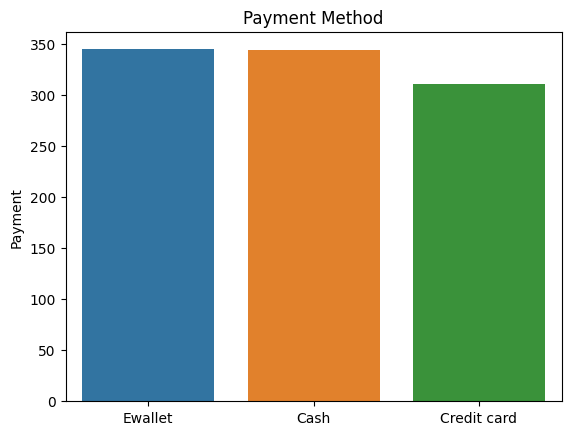

In [ ]:
sns.barplot(x=payment_df.index , y=payment_df.Payment)
plt.title('Payment Method')

Text(0.5, 1.0, 'pdoduct line based on gross income')

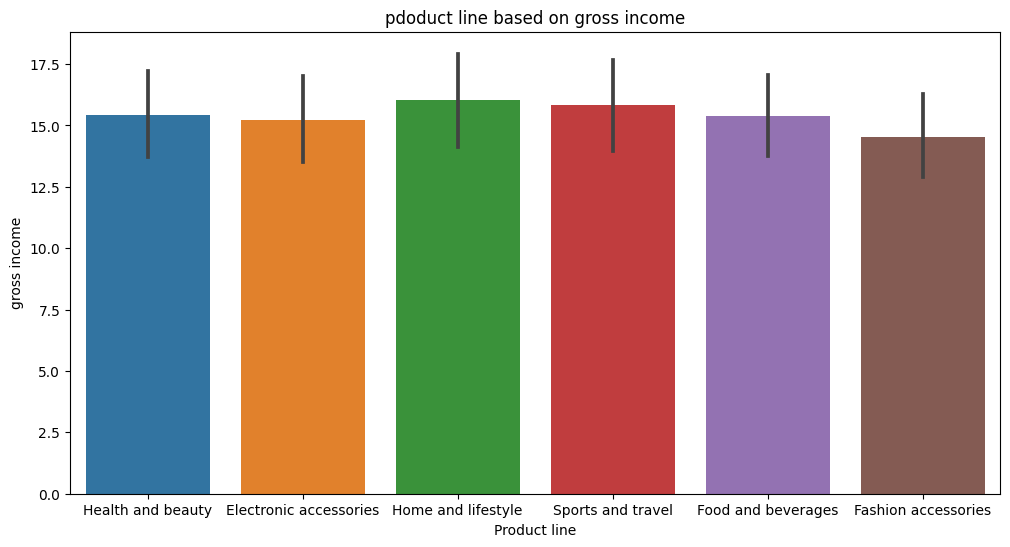

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'],y=df['gross income'])
plt.title("pdoduct line based on gross income")

([<matplotlib.axis.XTick at 0x7912aae5b1c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

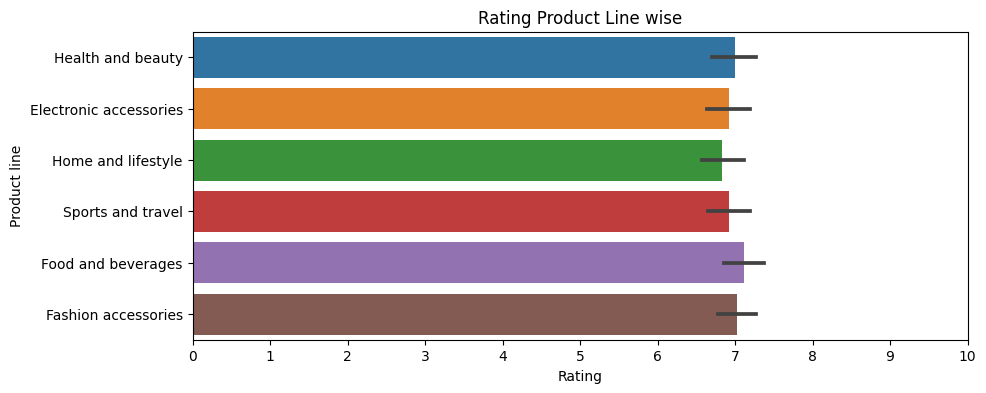

In [ ]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,4))
sns.barplot(y=df['Product line'],x=df['Rating'])
plt.title("Rating Product Line wise")
plt.xticks(xdata)

<Axes: xlabel='Total', ylabel='Product line'>

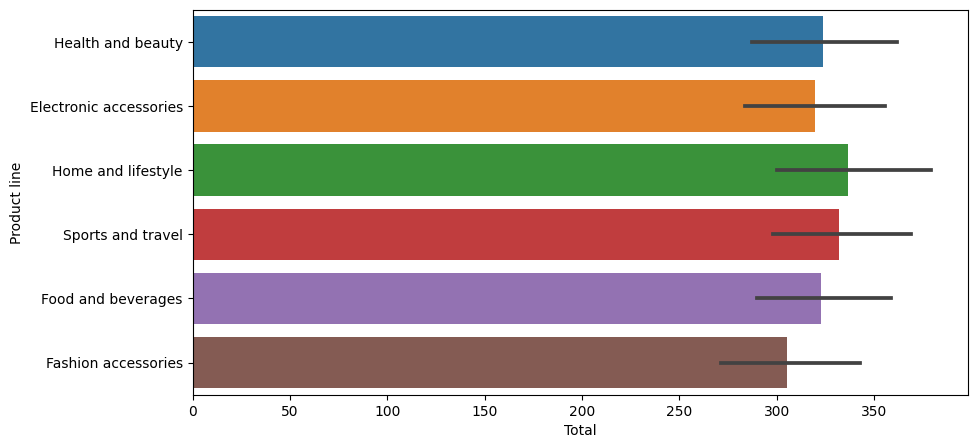

In [ ]:
# total bill in each product line
plt.figure(figsize=(10,5))
sns.barplot(x=df['Total'],y=df['Product line'])

<ipython-input-41-ec0beedb3130>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


([<matplotlib.axis.XTick at 0x7912aad89660>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

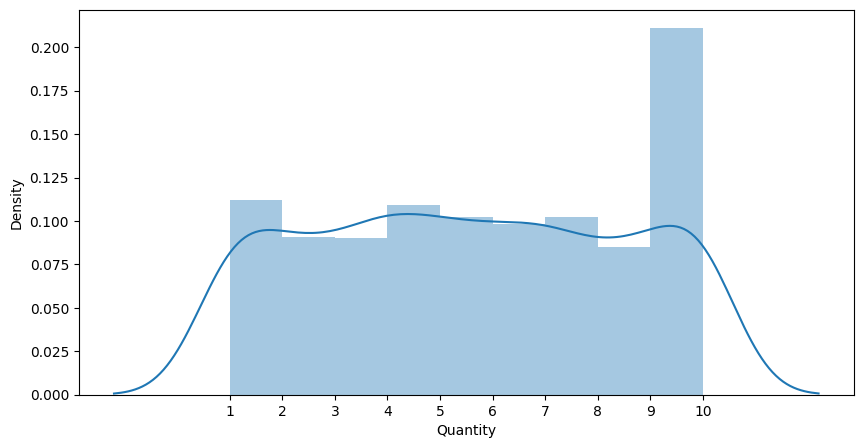

In [ ]:
xdata=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,5))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

In [ ]:
quantity_df=pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


<Figure size 1000x600 with 0 Axes>

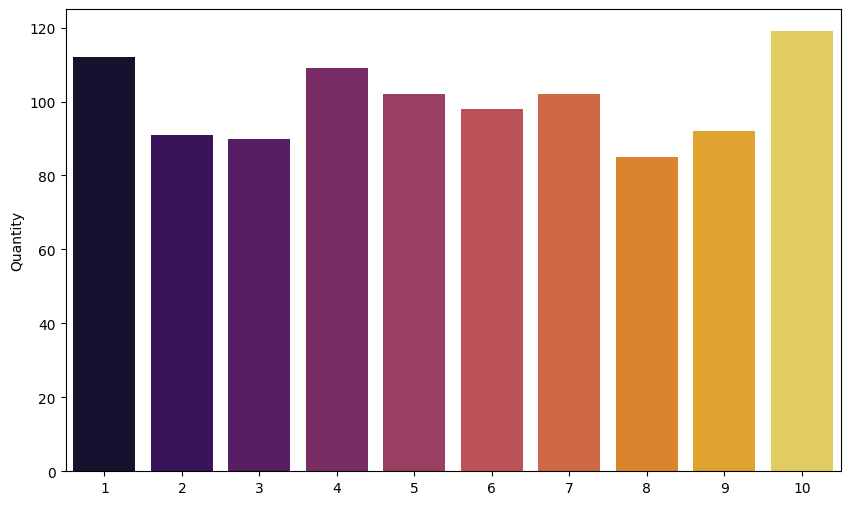

In [ ]:
plt.figure(figsize=(10,6))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_df.index, y=quantity_df['Quantity'], palette='inferno')
plt.show()

<ipython-input-44-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

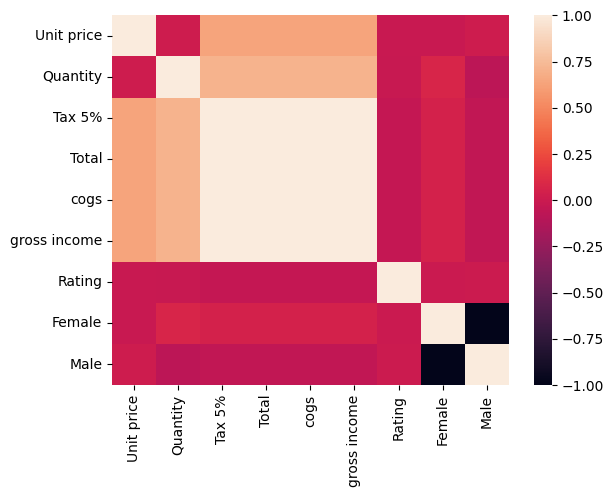

In [ ]:
sns.heatmap(df.corr())

pyspark operations

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=7e8625bbecc3e3d9000ab2c66d69031d9e363131d103ebf94c2c144700fe8edc
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
!pip install findspark
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.10/dist-packages/pyspark'

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

Importing dataset

In [ ]:
sc = SparkContext(appName="Supermarket sales prediction")
sqlc = SQLContext(sc)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
data_file = '/content/supermarket_sales (1).csv'

In [ ]:
data = sqlc.read.csv(data_file,header = True)

Data exploration

In [ ]:
data.count()

1000

In [ ]:
data.dtypes

[('Invoice ID', 'string'),
 ('Branch', 'string'),
 ('City', 'string'),
 ('Customer type', 'string'),
 ('Gender', 'string'),
 ('Product line', 'string'),
 ('Unit price', 'string'),
 ('Quantity', 'string'),
 ('Tax 5%', 'string'),
 ('Total', 'string'),
 ('Date', 'string'),
 ('Time', 'string'),
 ('Payment', 'string'),
 ('cogs', 'string'),
 ('gross margin percentage', 'string'),
 ('gross income', 'string'),
 ('Rating', 'string')]

To retrieve the first 5 rows of the DataFrame data in PySpark and convert them to a Pandas DataFrame for better understanding.



In [ ]:
data.limit(5).toPandas()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.4,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761904762,30.2085,5.3


To group the DataFrame data by the 'gross income' column and count the number of occurrences for each group in PySpark

In [ ]:
data.groupBy('gross income').count().show()

+------------+-----+
|gross income|count|
+------------+-----+
|     44.8785|    1|
|      0.9575|    1|
|      16.814|    1|
|      4.4225|    1|
|      3.0125|    1|
|       3.939|    1|
|        38.3|    1|
|      27.396|    1|
|      3.6085|    1|
|     24.3315|    1|
|       6.287|    1|
|      15.494|    1|
|     36.3555|    1|
|       3.743|    1|
|     18.7775|    1|
|       9.318|    1|
|      4.4875|    1|
|       23.67|    1|
|     36.2115|    1|
|     12.7305|    1|
+------------+-----+
only showing top 20 rows



In [ ]:
#Check if there is missing values in the data
from pyspark.sql.functions import col,sum
data.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in data.columns)).show()

+----------+------+----+-------------+------+------------+----------+--------+------+-----+----+----+-------+----+-----------------------+------------+------+
|Invoice ID|Branch|City|Customer type|Gender|Product line|Unit price|Quantity|Tax 5%|Total|Date|Time|Payment|cogs|gross margin percentage|gross income|Rating|
+----------+------+----+-------------+------+------------+----------+--------+------+-----+----+----+-------+----+-----------------------+------------+------+
|         0|     0|   0|            0|     0|           0|         0|       0|     0|    0|   0|   0|      0|   0|                      0|           0|     0|
+----------+------+----+-------------+------+------------+----------+--------+------+-----+----+----+-------+----+-----------------------+------------+------+



Understand the data which belongs to the income

In [ ]:
subd = data.filter(data['gross income'] == 1).groupby('City').count().show()

+---------+-----+
|     City|count|
+---------+-----+
|Naypyitaw|   16|
| Mandalay|   13|
|   Yangon|   11|
+---------+-----+



In [ ]:
data.groupby('Product line').count().show()

+--------------------+-----+
|        Product line|count|
+--------------------+-----+
|  Home and lifestyle|  160|
| Fashion accessories|  178|
|   Health and beauty|  152|
|Electronic access...|  170|
|  Food and beverages|  174|
|   Sports and travel|  166|
+--------------------+-----+



In [ ]:
data_pd = data.toPandas()

# Display the columns horizontally
print(data_pd.columns.tolist())

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.sql.functions import col, when, sum, lit
from pyspark.sql.types import StringType, IntegerType, FloatType
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

In [ ]:
from pyspark.sql.functions import col

# Convert columns with numeric data to the appropriate data types
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'Rating']
for col_name in numeric_columns:
    data = data.withColumn(col_name, col(col_name).cast('float'))

# Display the columns horizontally
print(data.columns)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [ ]:
# List of non-numeric columns to drop
non_numeric_columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']
data = data.drop(*non_numeric_columns)

In [ ]:
# Convert "gross income" column to FloatType, replacing non-numeric values with null
data = data.withColumn("gross income", when(col("gross income").cast("float").isNotNull(), col("gross income").cast("float")))


In [ ]:
target_column = 'gross income'

fractions = data.select(target_column).distinct().withColumn("fraction", lit(0.8)).rdd.collectAsMap()
df_train = data.sampleBy(target_column, fractions, seed=17)
df_test = data.subtract(df_train)

# Create a VectorAssembler to assemble the feature columns into a single "features" column
feature_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total','cogs', 'gross margin percentage','Rating']  # Replace with relevant feature columns from your dataset
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Apply the VectorAssembler to the training data
df_train = assembler.transform(df_train)

# Create a RandomForestRegressor model
rf = RandomForestRegressor(labelCol=target_column, featuresCol='features')

# Create a parameter grid for tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .addGrid(rf.numTrees, [20, 50, 100]) \
    .build()

# Create an evaluator for regression
evaluator = RegressionEvaluator(labelCol=target_column)

# Create TrainValidationSplit for tuning
tvs = TrainValidationSplit(estimator=rf,
                           estimatorParamMaps=paramGrid,
                           evaluator=evaluator,
                           trainRatio=0.8)

# Fit the model and perform tuning
model = tvs.fit(df_train)

# Apply the VectorAssembler to the test data
df_test = assembler.transform(df_test)

# Make predictions on the test data
predictions = model.transform(df_test)

# Evaluate the regression performance (e.g., using Root Mean Squared Error)
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.5486056866605895


Inference:

Data Preprocessing:

The code converts the PySpark DataFrame data to a Pandas DataFrame data_pd and prints the columns horizontally.
Columns with numeric data (Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, and Rating) are converted to the appropriate data types as float values.
Non-numeric columns (Invoice ID, Branch, City, Customer type, Gender, Product line, Date, Time, Payment) are dropped from the DataFrame.
The "gross income" column is converted to FloatType, handling non-numeric values by replacing them with null.

Data Split:

The data is split into training and test datasets based on the "gross income" column. Approximately 80% of the data is used for training (df_train) and the remaining 20% for testing (df_test).

Model Building:

The feature columns (Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, and Rating) are assembled into a single "features" column using VectorAssembler.

A RandomForestRegressor model is created for regression, with the target column set to "gross income" and the features column as "features".
A parameter grid is defined to perform hyperparameter tuning on the RandomForestRegressor model, considering different values for maxDepth and numTrees.

A regression evaluator is used to evaluate the model performance, and a TrainValidationSplit is performed to find the best hyperparameters.

Model Evaluation:

The tuned model is used to make predictions on the test data (df_test).
The Root Mean Squared Error (RMSE) is calculated using the regression evaluator to measure the model's performance on the test data.
The RMSE value is printed as the evaluation result.

The inference for the model's performance is given by the Root Mean Squared Error (RMSE) value. A lower RMSE indicates a better fit of the regression model to the data.
The printed RMSE value represents the evaluation of the RandomForestRegressor model on the test data, which provides an estimate of how well the model can predict "gross income" based on the selected features.